# LeNet-5 like network
In this notebook, I will be creating a convolutional neural network that was inspired by the [LeNet-5 architecture](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf). We will be running it on the [mnist](http://yann.lecun.com/exdb/mnist/) dataset for which it was originally created.  

In [1]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/varun/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# Loading the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


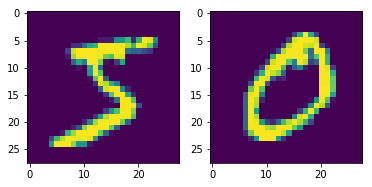

In [4]:
# A look at some of the inputs
f = plt.figure()
f.add_subplot(1, 2, 1)
plt.imshow(x_train[0])
f.add_subplot(1, 2, 2)
plt.imshow(x_train[1])
plt.show(block=True)

In [5]:
# Converting y_train and y_test to matrices with 10 columns (required for categorical_crossentropy loss)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [6]:
# Adding a dummy dimension to the end
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In the paper, the sigmoid activation function was used after the pooling layer and average pooling was used. In this implementation, we will using the relu activation after the convolutional layer and use max pooling.

In [7]:
# Building our model
model = Sequential()

# Layer 1
model.add(Conv2D(input_shape=(28, 28, 1), filters=6, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Layer 2
model.add(Conv2D(filters=16, kernel_size=5, strides=1, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Layer 3
model.add(Flatten())
model.add(Dense(120, activation='relu'))

# Layer 4
model.add(Dense(84, activation='relu'))

# Layer 5 (Output layer)
model.add(Dense(10, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Fitting the model
model.fit(x_train, y_train, epochs=2, batch_size=256, shuffle=False)

# Evaluate the model on the test set
score = model.evaluate(x_test, y_test)
print(score)

Epoch 1/2
60000/60000 [==============================] - 18s 304us/step - loss: 5.9740 - acc: 0.5741
Epoch 2/2
10000/10000 [==============================] - 2s 205us/step
[0.10936850308093708, 0.96730000000000005]


In [9]:
model.metrics_names

['loss', 'acc']

We managed to get an accuracy of over 96% on the test data with only 2 epochs!